In [1]:
library(Matrix)
library(GenomicRanges)
library(Seurat)
library(SeuratDisk)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

The legacy packages maptools, rgdal, a

In [2]:
skin_atac=readMM('/data/xinyi/shareseq/GSM4156597_skin.late.anagen.counts.txt.gz')

In [3]:
skin_barcode=read.csv('/data/xinyi/shareseq/GSM4156597_skin.late.anagen.barcodes.txt.gz',header = FALSE)

In [4]:
skin_peaks=read.csv('/data/xinyi/shareseq/GSM4156597_skin.late.anagen.peaks.bed.gz',header = FALSE,sep = '\t')

In [5]:
skin_celltypes=read.csv('/data/xinyi/shareseq/GSM4156597_skin_celltype.txt.gz',header=TRUE,sep='\t')

In [7]:
skin_rna=read.table('/data/xinyi/shareseq/GSM4156608_skin.late.anagen.rna.counts.txt.gz')

In [8]:
colnames(skin_rna)<-skin_rna[1,]

In [9]:
skin_rna=skin_rna[-1,]

In [10]:
colnames(skin_rna)=gsub(',','.',colnames(skin_rna))

In [12]:
skin_atac=as.matrix(skin_atac)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 89.3 GiB”


In [13]:
skin_atac=as.data.frame(skin_atac)

In [14]:
skin_atac=cbind(skin_peaks,skin_atac)

In [15]:
colnames(skin_atac)=c('chr','start','end',skin_barcode$V1)

In [16]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,10465366,559.0,18599114,993.3,18599114,993.3
Vcells,13002767108,99203.3,27545539043,210155.8,26080031404,198974.9


In [18]:
skin_atac=skin_atac[apply(skin_atac[,4:ncol(skin_atac)], 1, max) > 2,]

In [20]:
dim(skin_atac)

[1] 70284 34777

In [21]:
skin_rna=skin_rna[apply(skin_rna, 1, max) > 4,]

In [23]:
dim(skin_rna)

[1] 22666 42949

In [24]:
sharedCells=intersect(colnames(skin_rna),colnames(skin_atac))

In [25]:
length(sharedCells)

[1] 34774

In [26]:
skin_rna=skin_rna[,c('gene',sharedCells)]

In [27]:
dim(skin_rna)

[1] 22666 34775

In [25]:
# store as h5ad
skin_rna=CreateSeuratObject(skin_rna[,2:ncol(skin_rna)],row.names = skin_rna$gene)

In [27]:
SaveH5Seurat(skin_rna,filename = '/data/xinyi/shareseq/skin_rna.h5Seurat')

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [28]:
Convert('/data/xinyi/shareseq/skin_rna.h5Seurat',dest='h5ad')

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [29]:
# store as h5ad
skin_atac_seurat=CreateSeuratObject(skin_atac[,4:ncol(skin_atac)],row.names = paste0(skin_atac$chr, '_', skin_atac$start, '_', skin_atac$end))


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [36]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5615390,299.9,9804137,523.6,9804137,523.6
Vcells,2620920553,19996.1,7143751939,54502.6,52176593497,398075.9


In [ ]:
skin_atac_seurat$celltype=skin_celltypes$celltype

In [34]:
SaveH5Seurat(skin_atac_seurat,filename = '/data/xinyi/shareseq/skin_atac.h5Seurat')

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA



In [35]:
Convert('/data/xinyi/shareseq/skin_atac.h5Seurat',dest='h5ad')

Validating h5Seurat file

Adding data from RNA as X

Adding counts from RNA as raw

Transfering meta.data to obs



In [2]:
skin_atac=LoadH5Seurat('/data/xinyi/shareseq/skin_atac.h5Seurat')

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [29]:
#annotate
gr = makeGRangesFromDataFrame(skin_atac, keep.extra.columns=T)

In [30]:
peakAnno = annotatePeak(gr, tssRegion=c(-1000, 1000), TxDb=TxDb.Mmusculus.UCSC.mm10.knownGene, annoDb="org.Mm.eg.db")


>> preparing features information...		 2023-08-30 01:58:54 PM 
>> identifying nearest features...		 2023-08-30 01:58:54 PM 
>> calculating distance from peak to TSS...	 2023-08-30 01:59:10 PM 
>> assigning genomic annotation...		 2023-08-30 01:59:10 PM 
>> adding gene annotation...			 2023-08-30 01:59:25 PM 


Loading required package: org.Mm.eg.db



'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2023-08-30 01:59:25 PM 
>> done...					 2023-08-30 01:59:25 PM 


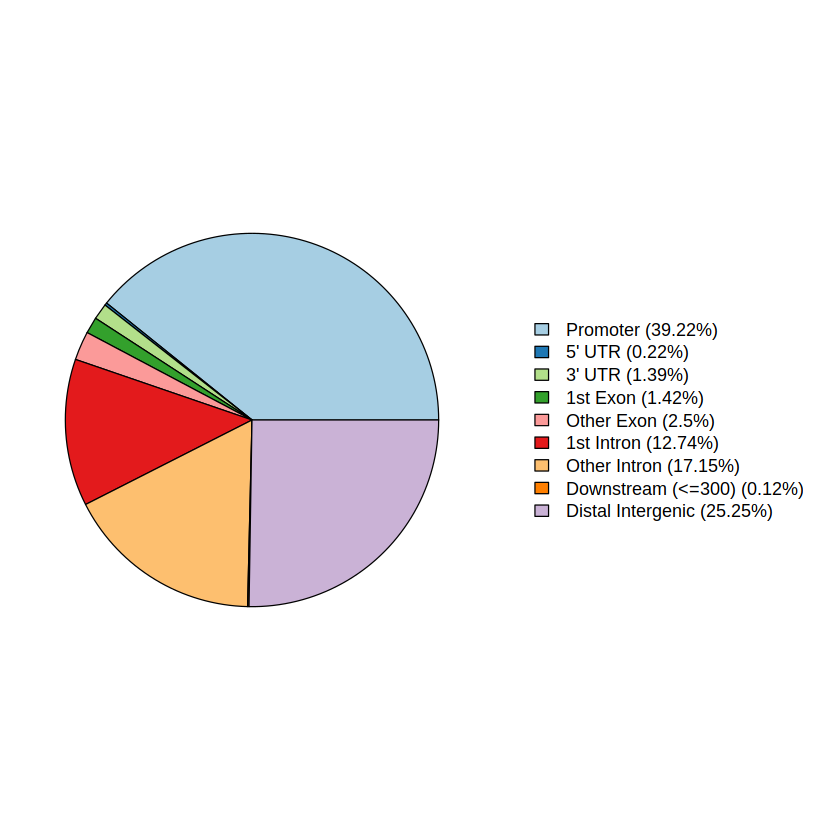

In [31]:
plotAnnoPie(peakAnno)

In [32]:
peakAnno

Annotated peaks generated by ChIPseeker
70284/70284  peaks were annotated
Genomic Annotation Summary:
             Feature  Frequency
9           Promoter 39.2237209
4             5' UTR  0.2162654
3             3' UTR  1.3858062
1           1st Exon  1.4171077
7         Other Exon  2.4970121
2         1st Intron 12.7383188
8       Other Intron 17.1461499
6 Downstream (<=300)  0.1223607
5  Distal Intergenic 25.2532582

In [34]:
peakAnnoDF <- as.data.frame(peakAnno@anno)

In [49]:
peakAnnoDF[34780:34791]

,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,Distal Intergenic,20,143518591,143797792,279202,1,18481,ENSMUST00000033640.13,-35385,ENSMUSG00000031284,Pak3,p21 (RAC1) activated kinase 3
2,Distal Intergenic,6,3288519,3317019,28501,1,667335,ENSMUST00000201943.1,-87243,ENSMUSG00000106779,Gm8579,spermatogenesis associated glutamate (E)-rich protein 4a pseudogene
3,3' UTR,9,123454790,123461899,7110,1,102436,ENSMUST00000215087.1,7060,ENSMUSG00000035202,Lars2,"leucyl-tRNA synthetase, mitochondrial"
4,Distal Intergenic,1,56636044,56637435,1392,2,71066,ENSMUST00000062085.5,-144660,ENSMUSG00000045336,Hsfy2,"heat shock transcription factor, Y-linked 2"
5,"Exon (ENSMUST00000102326.1/ENSMUST00000102326.1, exon 1 of 1)",9,56201126,56244065,42940,2,244895,ENSMUST00000188142.6,20097,ENSMUSG00000074305,Peak1,pseudopodium-enriched atypical kinase 1
6,Promoter,1,88277661,88308073,30413,1,171382,ENSMUST00000148138.7,0,ENSMUSG00000036251,Trpm8,"transient receptor potential cation channel, subfamily M, member 8"
7,Promoter,18,31635085,31647275,12191,1,269003,ENSMUST00000234846.1,0,ENSMUSG00000024260,Sap130,Sin3A associated protein
8,"Intron (ENSMUST00000231621.1/13972, intron 2 of 7)",16,18548743,18552584,3842,1,13972,ENSMUST00000151253.1,-15320,ENSMUSG00000000884,Gnb1l,"guanine nucleotide binding protein (G protein), beta polypeptide 1-like"
9,Promoter,1,165461037,165481214,20178,1,70456,ENSMUST00000027853.5,0,ENSMUSG00000026568,Mpc2,mitochondrial pyruvate carrier 2


In [47]:
length(peakAnno@anno$SYMBOL)

[1] 70284

In [35]:
write.csv(peakAnno@anno$SYMBOL,'/data/xinyi/shareseq/skin_atac_symbol.csv')

In [50]:
write.csv(peakAnnoDF[34780:34791],'/data/xinyi/shareseq/skin_atac_allAnnotations.csv')